In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import geopy
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

In [102]:
data=pd.read_csv("cost-of-living.csv")

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Columns: 161 entries, Unnamed: 0 to Quito, Ecuador
dtypes: float64(160), object(1)
memory usage: 69.3+ KB


In [30]:
data.describe()

,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,947.569636,1030.352000,973.539818,1235.551636,726.469091,1400.266909,939.282727,712.967455,800.866182,717.254182,...,876.614545,793.913091,921.488182,1344.416364,1703.642545,1173.578182,1059.191273,1256.769818,928.888000,1067.515636
std,3689.965894,4357.787422,4320.550584,4477.879943,3173.541506,4600.941958,4371.550743,3146.635068,3295.012186,3038.846698,...,3873.193779,3427.781972,4158.043792,4608.688084,6586.478694,3435.494486,3334.744925,3493.282897,4406.118669,4490.334519
min,0.030000,0.110000,0.090000,0.070000,0.070000,0.180000,0.010000,0.100000,0.030000,0.060000,...,0.030000,0.030000,0.120000,0.230000,0.130000,0.120000,0.320000,0.380000,0.010000,0.110000
25%,0.950000,0.855000,0.750000,2.180000,0.955000,1.995000,0.580000,0.930000,0.830000,1.025000,...,1.075000,0.975000,0.810000,2.070000,1.900000,2.400000,2.275000,2.430000,0.585000,1.330000
50%,4.400000,3.820000,3.060000,8.000000,3.610000,8.000000,3.380000,3.580000,3.540000,4.250000,...,3.600000,4.400000,3.060000,8.200000,10.370000,7.120000,7.320000,7.680000,3.380000,5.390000
75%,73.370000,43.365000,37.700000,82.575000,71.395000,86.485000,43.350000,68.605000,43.120000,35.250000,...,72.720000,73.910000,38.110000,75.620000,92.750000,79.930000,80.330000,90.720000,36.410000,49.155000
max,19305.290000,24443.150000,24443.150000,24402.770000,17238.130000,23233.330000,25098.600000,16859.680000,18564.590000,16535.220000,...,20706.610000,18196.160000,22948.670000,21788.330000,34921.490000,15479.870000,16149.980000,15845.500000,23626.730000,25324.920000


In [31]:
data.head()

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,...,3.75,5.72,3.82,15.0,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.0,17.48,22.99,23.73,...,18.76,22.01,11.47,60.0,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.0,4.51,3.58,4.22,...,3.56,3.67,3.06,8.2,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.0,1.69,1.02,0.84,...,1.50,1.10,2.37,4.0,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.0,2.82,1.53,2.11,...,1.50,2.20,3.06,4.0,7.26,5.57,5.59,4.97,2.81,2.70


In [103]:
data.tail()

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
50,Onion (1kg),0.48,0.62,0.58,1.25,0.59,1.27,0.34,0.64,0.39,...,0.41,0.36,0.55,1.30,0.94,1.78,1.29,1.72,0.31,0.94
51,Beef Round (1kg) (or Equivalent Back Leg Red M...,7.18,9.73,8.61,12.34,5.37,17.75,8.06,7.43,6.15,...,5.65,7.20,10.08,13.56,13.52,9.42,9.49,11.24,8.37,6.46
52,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,19305.29,20874.72,20898.83,24402.77,17238.13,23233.33,21020.29,16529.98,18564.59,...,20334.03,18129.31,20892.07,21788.33,34921.49,15221.84,15239.20,15066.62,23071.86,25324.92
53,"Preschool (or Kindergarten), Full Day, Private...",411.83,282.94,212.18,351.60,210.52,617.27,121.15,128.70,208.84,...,192.51,222.83,200.51,695.44,566.18,1250.41,1190.12,1389.43,55.41,276.63
54,"International Primary School, Yearly for 1 Child",5388.86,6905.43,4948.41,1641.00,2679.30,10761.90,2781.29,1348.77,5657.01,...,2729.00,2474.58,4036.19,18342.86,4019.43,12874.09,11526.08,11933.55,2132.54,6410.05


In [32]:
data.shape

(55, 161)

In [108]:
data.corr()

<ipython-input-108-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
"Saint Petersburg, Russia",1.000000,0.994591,0.992885,0.974678,0.994256,0.978407,0.986334,0.989404,0.994240,0.995817,...,0.992920,0.993897,0.992960,0.931602,0.989569,0.918586,0.950830,0.907843,0.987507,0.995093
"Istanbul, Turkey",0.994591,1.000000,0.998096,0.952730,0.989128,0.964077,0.991457,0.984674,0.985827,0.994348,...,0.990246,0.989795,0.995722,0.929162,0.976233,0.906851,0.946219,0.890543,0.986314,0.987005
"Izmir, Turkey",0.992885,0.998096,1.000000,0.957592,0.993289,0.952577,0.997541,0.991896,0.982589,0.997639,...,0.995497,0.994748,0.999179,0.905866,0.980290,0.882891,0.926335,0.867759,0.993682,0.986317
"Helsinki, Finland",0.974678,0.952730,0.957592,1.000000,0.972899,0.962191,0.959737,0.978581,0.960472,0.972428,...,0.972737,0.975903,0.961572,0.861826,0.995373,0.880925,0.902077,0.890961,0.967460,0.965490
"Chisinau, Moldova",0.994256,0.989128,0.993289,0.972899,1.000000,0.953016,0.992496,0.997321,0.990848,0.998019,...,0.999128,0.999303,0.996688,0.895879,0.988682,0.872939,0.914602,0.859678,0.997705,0.995356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Melbourne, Australia",0.918586,0.906851,0.882891,0.880925,0.872939,0.971561,0.853151,0.855945,0.913964,0.882666,...,0.865918,0.870543,0.873427,0.980660,0.888768,1.000000,0.992545,0.993922,0.845885,0.900548
"Perth, Australia",0.950830,0.946219,0.926335,0.902077,0.914602,0.981194,0.900232,0.897968,0.947804,0.923061,...,0.909050,0.912024,0.918198,0.991161,0.917133,0.992545,1.000000,0.979461,0.892862,0.937106
"Sydney, Australia",0.907843,0.890543,0.867759,0.890961,0.859678,0.971359,0.840817,0.847781,0.895982,0.870922,...,0.854349,0.859884,0.858101,0.955988,0.890584,0.993922,0.979461,1.000000,0.833124,0.883338
"Alexandria, Egypt",0.987507,0.986314,0.993682,0.967460,0.997705,0.936092,0.996751,0.998630,0.980236,0.996993,...,0.999164,0.998584,0.997150,0.870473,0.985194,0.845885,0.892862,0.833124,1.000000,0.987073


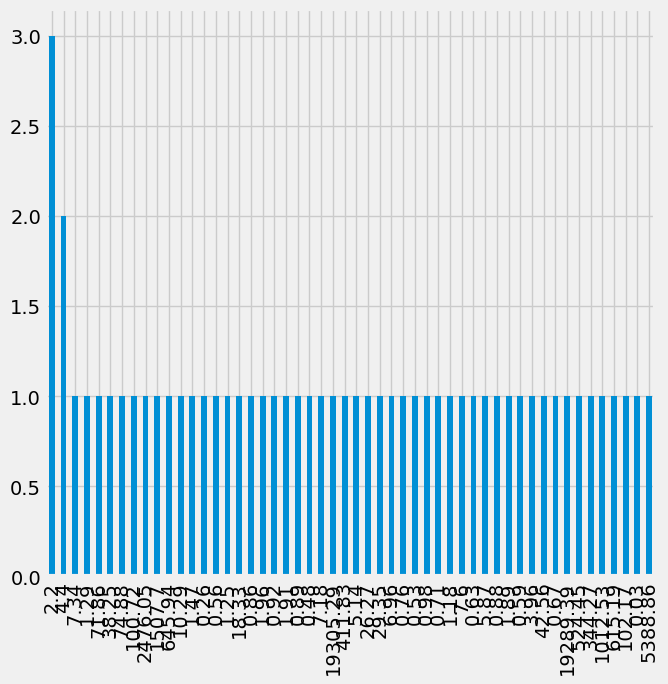

In [105]:
data['Saint Petersburg, Russia'].value_counts().plot(kind = 'bar');

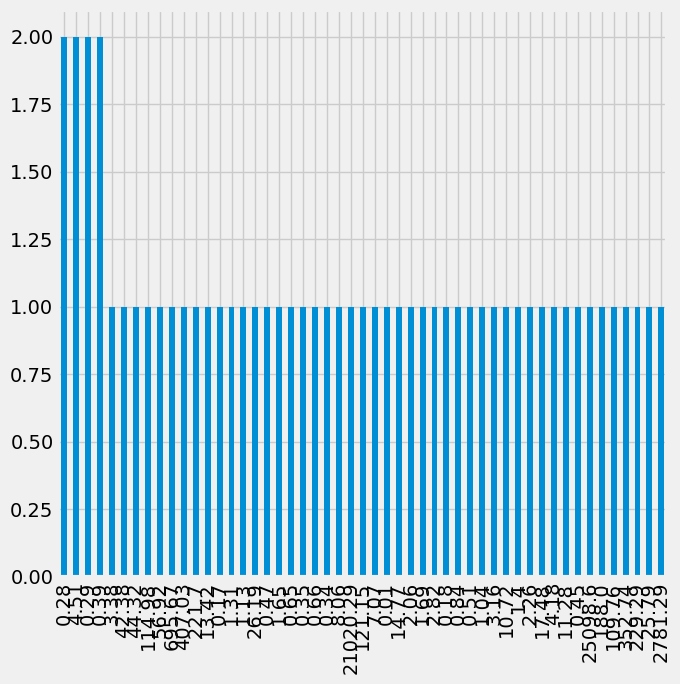

In [106]:
data['Cairo, Egypt'].value_counts().plot(kind = 'bar');

In [33]:
from geopy import Nominatim

l=Nominatim(user_agent="myGeocoder")


In [34]:
data = data.T
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0


In [35]:
data.rename(columns=data.iloc[0], inplace = True)
data.drop(data.index[0], inplace = True)


,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3


In [36]:
data = data.reset_index()
data = data.rename(columns={'index': 'Location'})

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3


In [40]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(l.geocode, min_delay_seconds=1)
data['location'] = data['Location'].apply(geocode)
data['point'] = data['location'].apply(lambda loc: tuple(loc.point) if loc else None)
data[['latitude', 'longitude', 'altitude']] = pd.DataFrame(data['point'].tolist(), index=data.index)
data.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",location,point,latitude,longitude,altitude
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.48,7.18,19305.29,411.83,5388.86,"(Санкт-Петербург, Северо-Западный федеральный ...","(59.938732, 30.316229, 0.0)",59.938732,30.316229,0.0
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.62,9.73,20874.72,282.94,6905.43,"(İstanbul, Fatih, İstanbul, Marmara Bölgesi, 3...","(41.0091982, 28.9662187, 0.0)",41.009198,28.966219,0.0
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.58,8.61,20898.83,212.18,4948.41,"(İzmir, Konak, İzmir, Ege Bölgesi, 00000, Türk...","(38.4224548, 27.1310699, 0.0)",38.422455,27.131070,0.0
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,...,1.25,12.34,24402.77,351.6,1641.0,"(Helsinki, Helsingin seutukunta, Uusimaa, Etel...","(60.1674881, 24.9427473, 0.0)",60.167488,24.942747,0.0
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.59,5.37,17238.13,210.52,2679.3,"(Chișinău, Municipiul Chișinău, Moldova, (47.0...","(47.0245117, 28.8322923, 0.0)",47.024512,28.832292,0.0


In [46]:
def food(data):
    return int(round((data[['Meal, Inexpensive Restaurant',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'Chicken Breasts (Boneless, Skinless), (1kg)', 'Apples (1kg)', 'Oranges (1kg)',
       'Potato (1kg)', 'Lettuce (1 head)', 'Cappuccino (regular)',
       'Rice (white), (1kg)', 'Tomato (1kg)', 'Banana (1kg)', 'Onion (1kg)',
       'Beef Round (1kg) (or Equivalent Back Leg Red Meat)',]].mean()).mean()))

def travel(data):
    return int(round((data[['One-way Ticket (Local Transport)',
                            'Monthly Pass (Regular Price)', 'Gasoline (1 liter)',
                           'Taxi Start (Normal Tariff)', 'Taxi 1km (Normal Tariff)',
                           'Taxi 1hour Waiting (Normal Tariff)',]].mean()).mean()))

def living(data):
    return int(round((data[[ 'Volkswagen Golf',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) Outside of Centre',
       'Price per Square Meter to Buy Apartment Outside of Centre',
        'Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)',]].mean()).mean()))

def lifestyle(data):
    return int(round((data[['1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)',
       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
       'Fitness Club, Monthly Fee for 1 Adult',
       'Tennis Court Rent (1 Hour on Weekend)',
       'Cinema, International Release, 1 Seat',
       '1 Pair of Jeans (Levis 501 Or Similar)',
       '1 Summer Dress in a Chain Store (Zara, H&M, ...)',
       '1 Pair of Nike Running Shoes (Mid-Range)',
       '1 Pair of Men Leather Business Shoes',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',]].mean()).mean()))

def education(data):
    return int(round((data[['Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child',
       'International Primary School, Yearly for 1 Child',]].mean()).mean()))

def income(data):
    return int(round((data[['Average Monthly Net Salary (After Tax)',
       'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate',]].mean()).mean()))

In [47]:
data['Food'] = data.apply(food, axis = 1)
data['Travel'] = data.apply(travel, axis = 1)
data['Living'] = data.apply(living, axis = 1)
data['Lifestyle'] = data.apply(lifestyle, axis = 1)
data['Education'] = data.apply(education, axis = 1)
data['Income'] = data.apply(income, axis = 1)

In [49]:
data['Location'].str.split(', ')[0]

['Saint Petersburg', 'Russia']

In [50]:
data['country'] = data['Location'].str.split(', ')
data['Country'] = data['country'].apply(lambda x: x[1])
data['Country'].value_counts()

India        11
Canada        8
Poland        6
Australia     5
Romania       5
             ..
Denmark       1
Slovenia      1
Sri Lanka     1
AZ            1
Ecuador       1
Name: Country, Length: 90, dtype: int64

In [64]:
data[['Country','Food','Travel',
      'Living','Lifestyle','Education','Income']].groupby(['Country']).agg('mean').style.background_gradient(cmap = 'Blues')

,Food,Travel,Living,Lifestyle,Education,Income
Country,,,,,,
AZ,4.000000,16.000000,8192.000000,35.000000,7088.000000,1559.000000
Albania,2.000000,5.000000,6963.000000,29.000000,1225.000000,171.000000
Argentina,2.000000,3.000000,7099.000000,28.000000,1638.000000,266.000000
Armenia,2.000000,3.000000,7417.000000,30.000000,1581.000000,154.000000
Australia,4.400000,21.600000,7266.800000,38.600000,5919.400000,1400.800000
Austria,4.000000,14.000000,10190.000000,40.000000,8124.000000,951.000000
Azerbaijan,2.000000,2.000000,7046.000000,32.000000,2933.000000,151.000000
Belarus,2.000000,3.000000,6569.000000,33.000000,2874.000000,224.000000
Belgium,4.000000,15.000000,9266.000000,42.000000,9519.000000,1146.000000


In [80]:
data['data'] = data['Location'].str.split(', ')
data['data'] = data['data'].apply(lambda x: x[0])
x = data[data['Country'] == 'India']

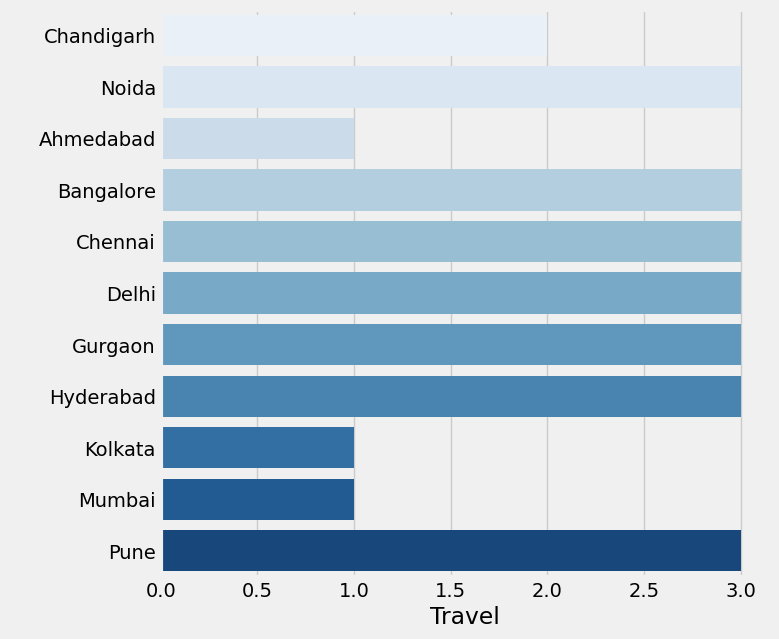

In [88]:
plt.rcParams['figure.figsize'] = (7, 7)
sns.barplot(y = x['data'], x = x['Travel'], palette = 'Blues')
plt.ylabel(" ")
plt.show()

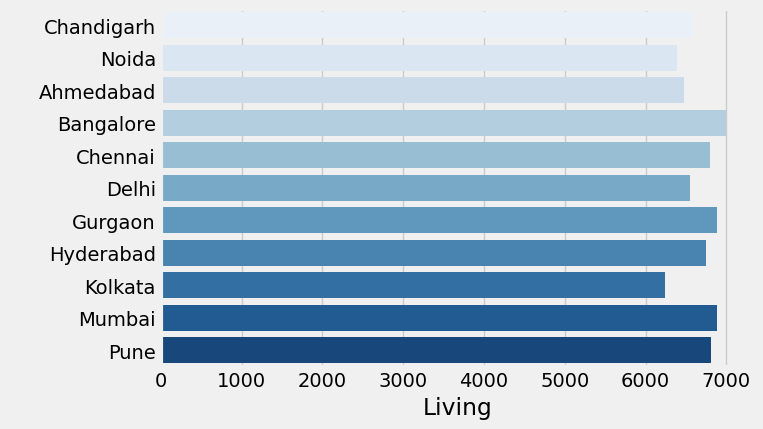

In [83]:
plt.subplot(3, 2, 2)
sns.barplot(y = x['data'], x = x['Living'], palette = 'Blues')
plt.ylabel(" ")
plt.show()

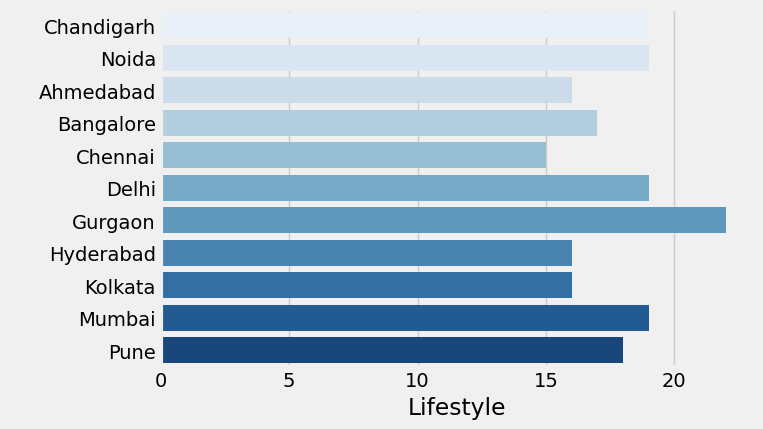

In [84]:
plt.subplot(3, 2, 3)
sns.barplot(y = x['data'], x = x['Lifestyle'], palette = 'Blues')
plt.ylabel(" ")
plt.show()

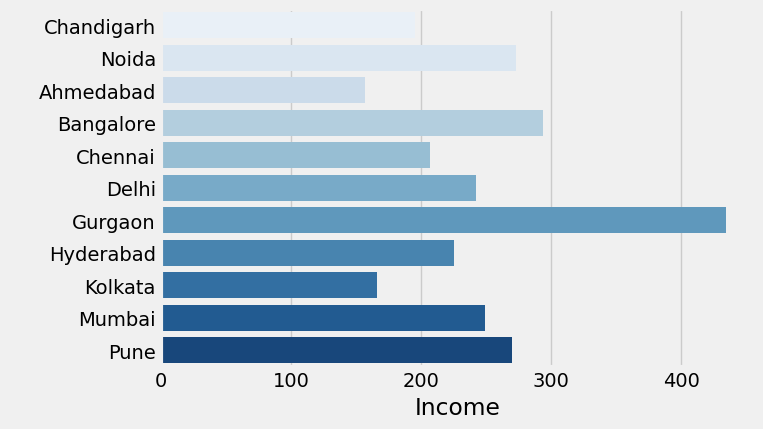

In [86]:
plt.subplot(3, 2, 5)
sns.barplot(y = x['data'], x = x['Income'], palette = 'Blues')
plt.ylabel(" ")
plt.show()

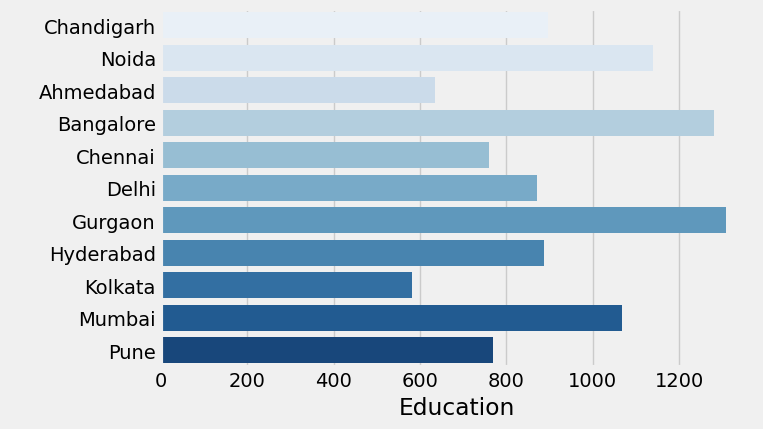

In [85]:
plt.subplot(3, 2, 4)
sns.barplot(y = x['data'], x = x['Education'], palette = 'Blues')
plt.ylabel(" ")
plt.show()

In [78]:
data[(data['Country'] == 'United Kingdom') | (data['Country'] == 'Australia')][['Location','Food',
                'Travel','Living','Lifestyle','Education',
                    'Income']].set_index('Location').sort_values(by = 'Income',
                                ascending = False).style.background_gradient(cmap = 'Blues')

,Food,Travel,Living,Lifestyle,Education,Income
Location,,,,,,
"Brisbane, Australia",5,22,6971,39,4910,1517
"Sydney, Australia",5,29,7848,42,6661,1511
"Melbourne, Australia",4,21,7541,39,7062,1398
"London, United Kingdom",4,37,12109,42,11423,1380
"Adelaide, Australia",4,16,6798,34,4606,1329
"Perth, Australia",4,20,7176,39,6358,1249


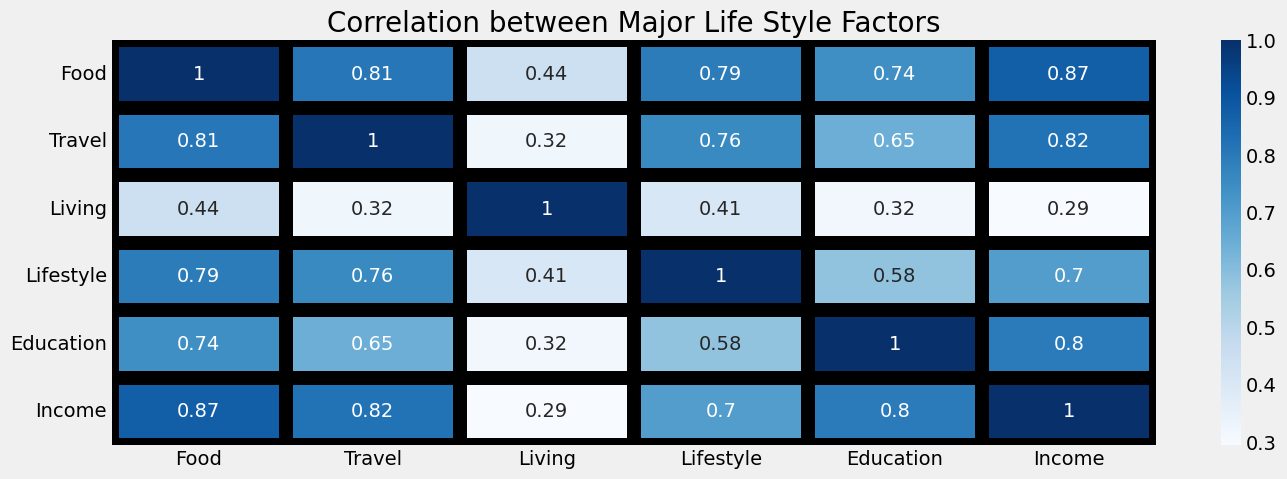

In [73]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.heatmap(data[['Food','Travel','Living','Lifestyle','Education','Income']].corr(),
            cmap = 'Blues',
            annot = True, linecolor='black', linewidths = 10)
plt.title('Correlation between Major Life Style Factors', fontsize = 20)
plt.show()

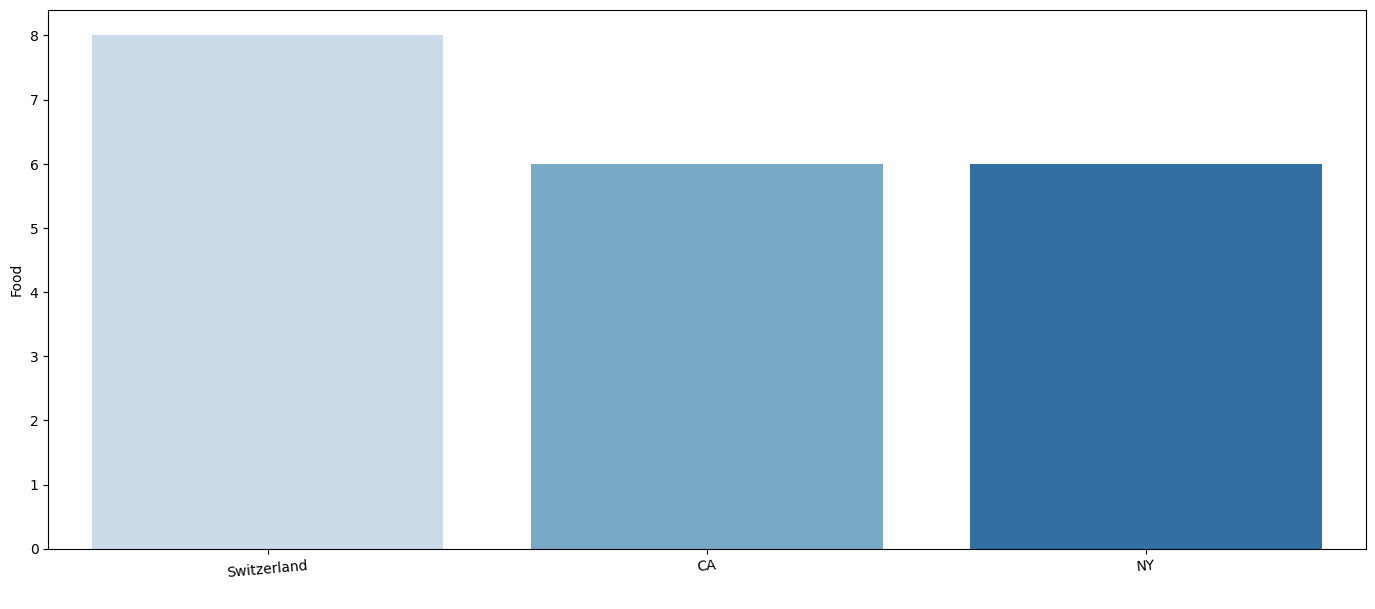

In [63]:
plt.rcParams['figure.figsize'] = (17, 7)

x = data[['Country', 'Food']].sort_values(by='Food', ascending=False).head(3)

sns.barplot(x='Country', y='Food', data=x, palette='Blues')
plt.xticks(rotation=5)
plt.xlabel(' ')
plt.show()

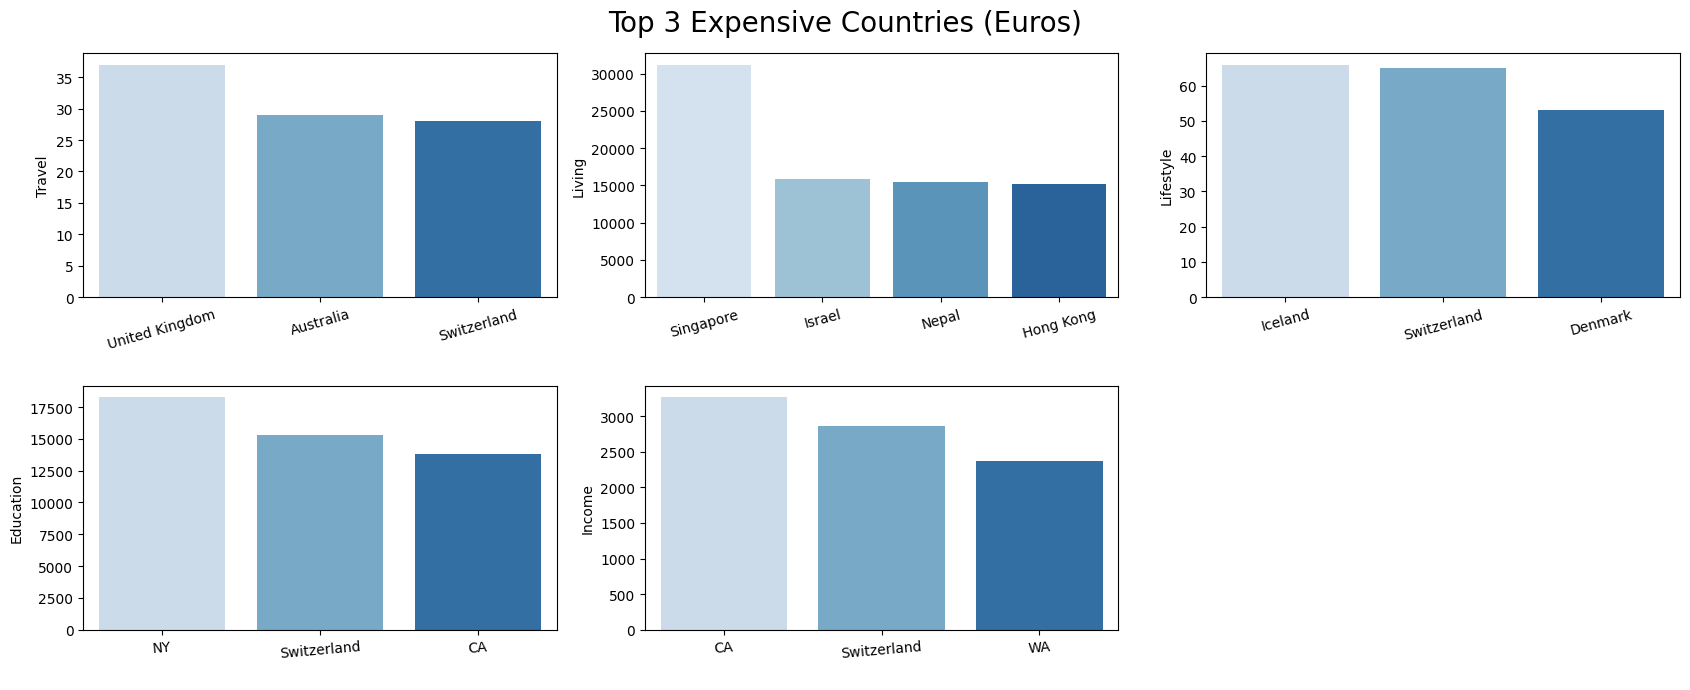

In [65]:
plt.subplot(2, 3, 1)
x = data[['Country', 'Travel']].sort_values(by='Travel', ascending=False).head(3)
sns.barplot(x='Country', y='Travel', data=x, palette='Blues')
plt.xticks(rotation=16)
plt.xlabel(' ')


plt.subplot(2, 3, 2)
x = data[['Country', 'Living']].sort_values(by='Living', ascending=False).head(4)
sns.barplot(x='Country', y='Living', data=x, palette='Blues')
plt.xticks(rotation=15)
plt.xlabel(' ')


plt.subplot(2, 3, 3)
x = data[['Country', 'Lifestyle']].sort_values(by='Lifestyle', ascending=False).head(3)
sns.barplot(x='Country', y='Lifestyle', data=x, palette='Blues')
plt.xticks(rotation=15)
plt.xlabel(' ')


plt.subplot(2, 3, 4)
x = data[['Country', 'Education']].sort_values(by='Education', ascending=False).head(3)
sns.barplot(x='Country', y='Education', data=x, palette='Blues')
plt.xticks(rotation=5)
plt.xlabel(' ')


plt.subplot(2, 3, 5)
x = data[['Country', 'Income']].sort_values(by='Income', ascending=False).head(3)
sns.barplot(x='Country', y='Income', data=x, palette='Blues')
plt.xticks(rotation=5)
plt.xlabel(' ')

plt.suptitle('Top 3 Expensive Countries (Euros)', fontsize=20)
plt.tight_layout()
plt.show()


In [66]:
top_range=(data.describe().loc['min',:]/data.describe().loc["max",:]).sort_values().index[2:22]
list(top_range)

['Education', 'Travel', 'Income', 'Food', 'Living', 'Lifestyle', 'altitude']

In [68]:
from folium import Circle
def cp(val):
  return 'blue'
map = folium.Map(location=[data['latitude'].mean(),
                           data['longitude'].mean()],
                 tiles='Stamen Terrain',
                 zoom_start=2)

item = top_range[0]

for i in range(0,len(data)):
    Circle(
        location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']],
        radius=120000,
        color=cp(data.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Education


In [71]:
def color_producer(val):
    if val <= data[item].quantile(.25):
        return 'forestgreen'
    elif val <= data[item].quantile(.50):
        return 'goldenrod'
    elif val <= data[item].quantile(.75):
        return 'darkred'
    else:
        return 'red'
map = folium.Map(location=[data['latitude'].mean(),
                           data['longitude'].mean()],
                 tiles='Stamen Terrain',
                 zoom_start=2)

item = top_range[2]

for i in range(0,len(data)):
    Circle(
        location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(data.iloc[i][item])).add_to(map)

print (item)
map

Income


In [72]:
map = folium.Map(location=[data['latitude'].mean(),
                           data['longitude'].mean()],
                 tiles='Stamen Terrain',
                 zoom_start=2)

item = top_range[3]

for i in range(0,len(data)):
    Circle(
        location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(data.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Food


In [92]:
x = data[['Food','Travel','Living','Lifestyle','Education','Income']]
mm = MinMaxScaler()
data = mm.fit_transform(x)
data = pd.DataFrame(data)
data.columns = x.columns
data.head()


,Food,Travel,Living,Lifestyle,Education,Income
0,0.142857,0.194444,0.145028,0.372549,0.139049,0.074890
1,0.142857,0.138889,0.185233,0.156863,0.177913,0.043424
2,0.142857,0.111111,0.183264,0.078431,0.121129,0.036816
3,0.428571,0.527778,0.230269,0.568627,0.032424,0.346759
4,0.142857,0.027778,0.097540,0.333333,0.057568,0.018250


In [95]:
data.columns

Index(['Food', 'Travel', 'Living', 'Lifestyle', 'Education', 'Income',
       'Total Score'],
      dtype='object')

In [97]:
data['Total Score'] = (data['Food'] + data['Travel'] + data['Living'] +
                       data['Lifestyle'] + data['Education'] + data['Income'])/6

print("Most Expensive Places in the World\n")
data[['Total Score']].sort_values(by = 'Total Score', ascending = False).head(10)

Most Expensive Places in the World



,Total Score
144,0.780645
78,0.654060
100,0.645828
39,0.576437
128,0.557425
70,0.545012
102,0.534038
50,0.532588
47,0.516406
71,0.480289
